In [1]:
#Importing libraries for data handling and analysis
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#importing warnings to avoid any future warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Getting the dataset

In [3]:
df = pd.read_csv(r"C:\Users\donga\OneDrive\Documents\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [5]:
# Checking the shape of the data
df.shape

(1470, 35)

In [6]:
# 1,470 Rows and 35 column are present.

In [7]:
# Checking  datatpes, null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
# Checking missing value is present in the dataset
df.isnull().values.any()

False

In [9]:
# Checking  for duplicates.
df.duplicated().sum()

0

In [10]:
# There is no missing value as well as duplicate record in the data.

In [11]:
# Statistical information about dataset
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [12]:
# Exploring Categorical Columns

In [13]:
df.describe(include = 'object')

Attrition BusinessTravel              Department EducationField Gender  \
count       1470           1470                    1470           1470   1470   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        1233           1043                     961            606    882   

                JobRole MaritalStatus Over18 OverTime  
count              1470          1470   1470     1470  
unique                9             3      1        2  
top     Sales Executive       Married      Y       No  
freq                326           673   1470     1054

In [14]:
#Exploring unique values of categorical columns 

In [15]:
for column in df.columns:
  if df[column].dtype == object:
    print(str(column) + ":" + str(df[column].unique()))
    print(df[column].value_counts())
    print("---------------------------------------------------------------------")

Attrition:['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
---------------------------------------------------------------------
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
---------------------------------------------------------------------
Department:['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
---------------------------------------------------------------------
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
---------------------------------------------------------------------

In [16]:
# We notice that 'EmployeeCount', 'Over18' and 'StandardHours' have only one unique values and 'EmployeeNumber' has 1470 unique values. These features are not useful for us so will drop those columns.

In [43]:
# Cleaning Dataset by dropping unwanted columns

In [17]:
# Deleting or removing unwanted columns
df = df.drop('Over18', axis = 1)
df = df.drop('EmployeeNumber', axis = 1)
df = df.drop('StandardHours', axis = 1)
df = df.drop('EmployeeCount', axis = 1)

In [18]:
# Checking shape of dataset after removing unwanted columns
df.shape

(1470, 31)

In [44]:
# Plotting Numerical Columns using Histograms

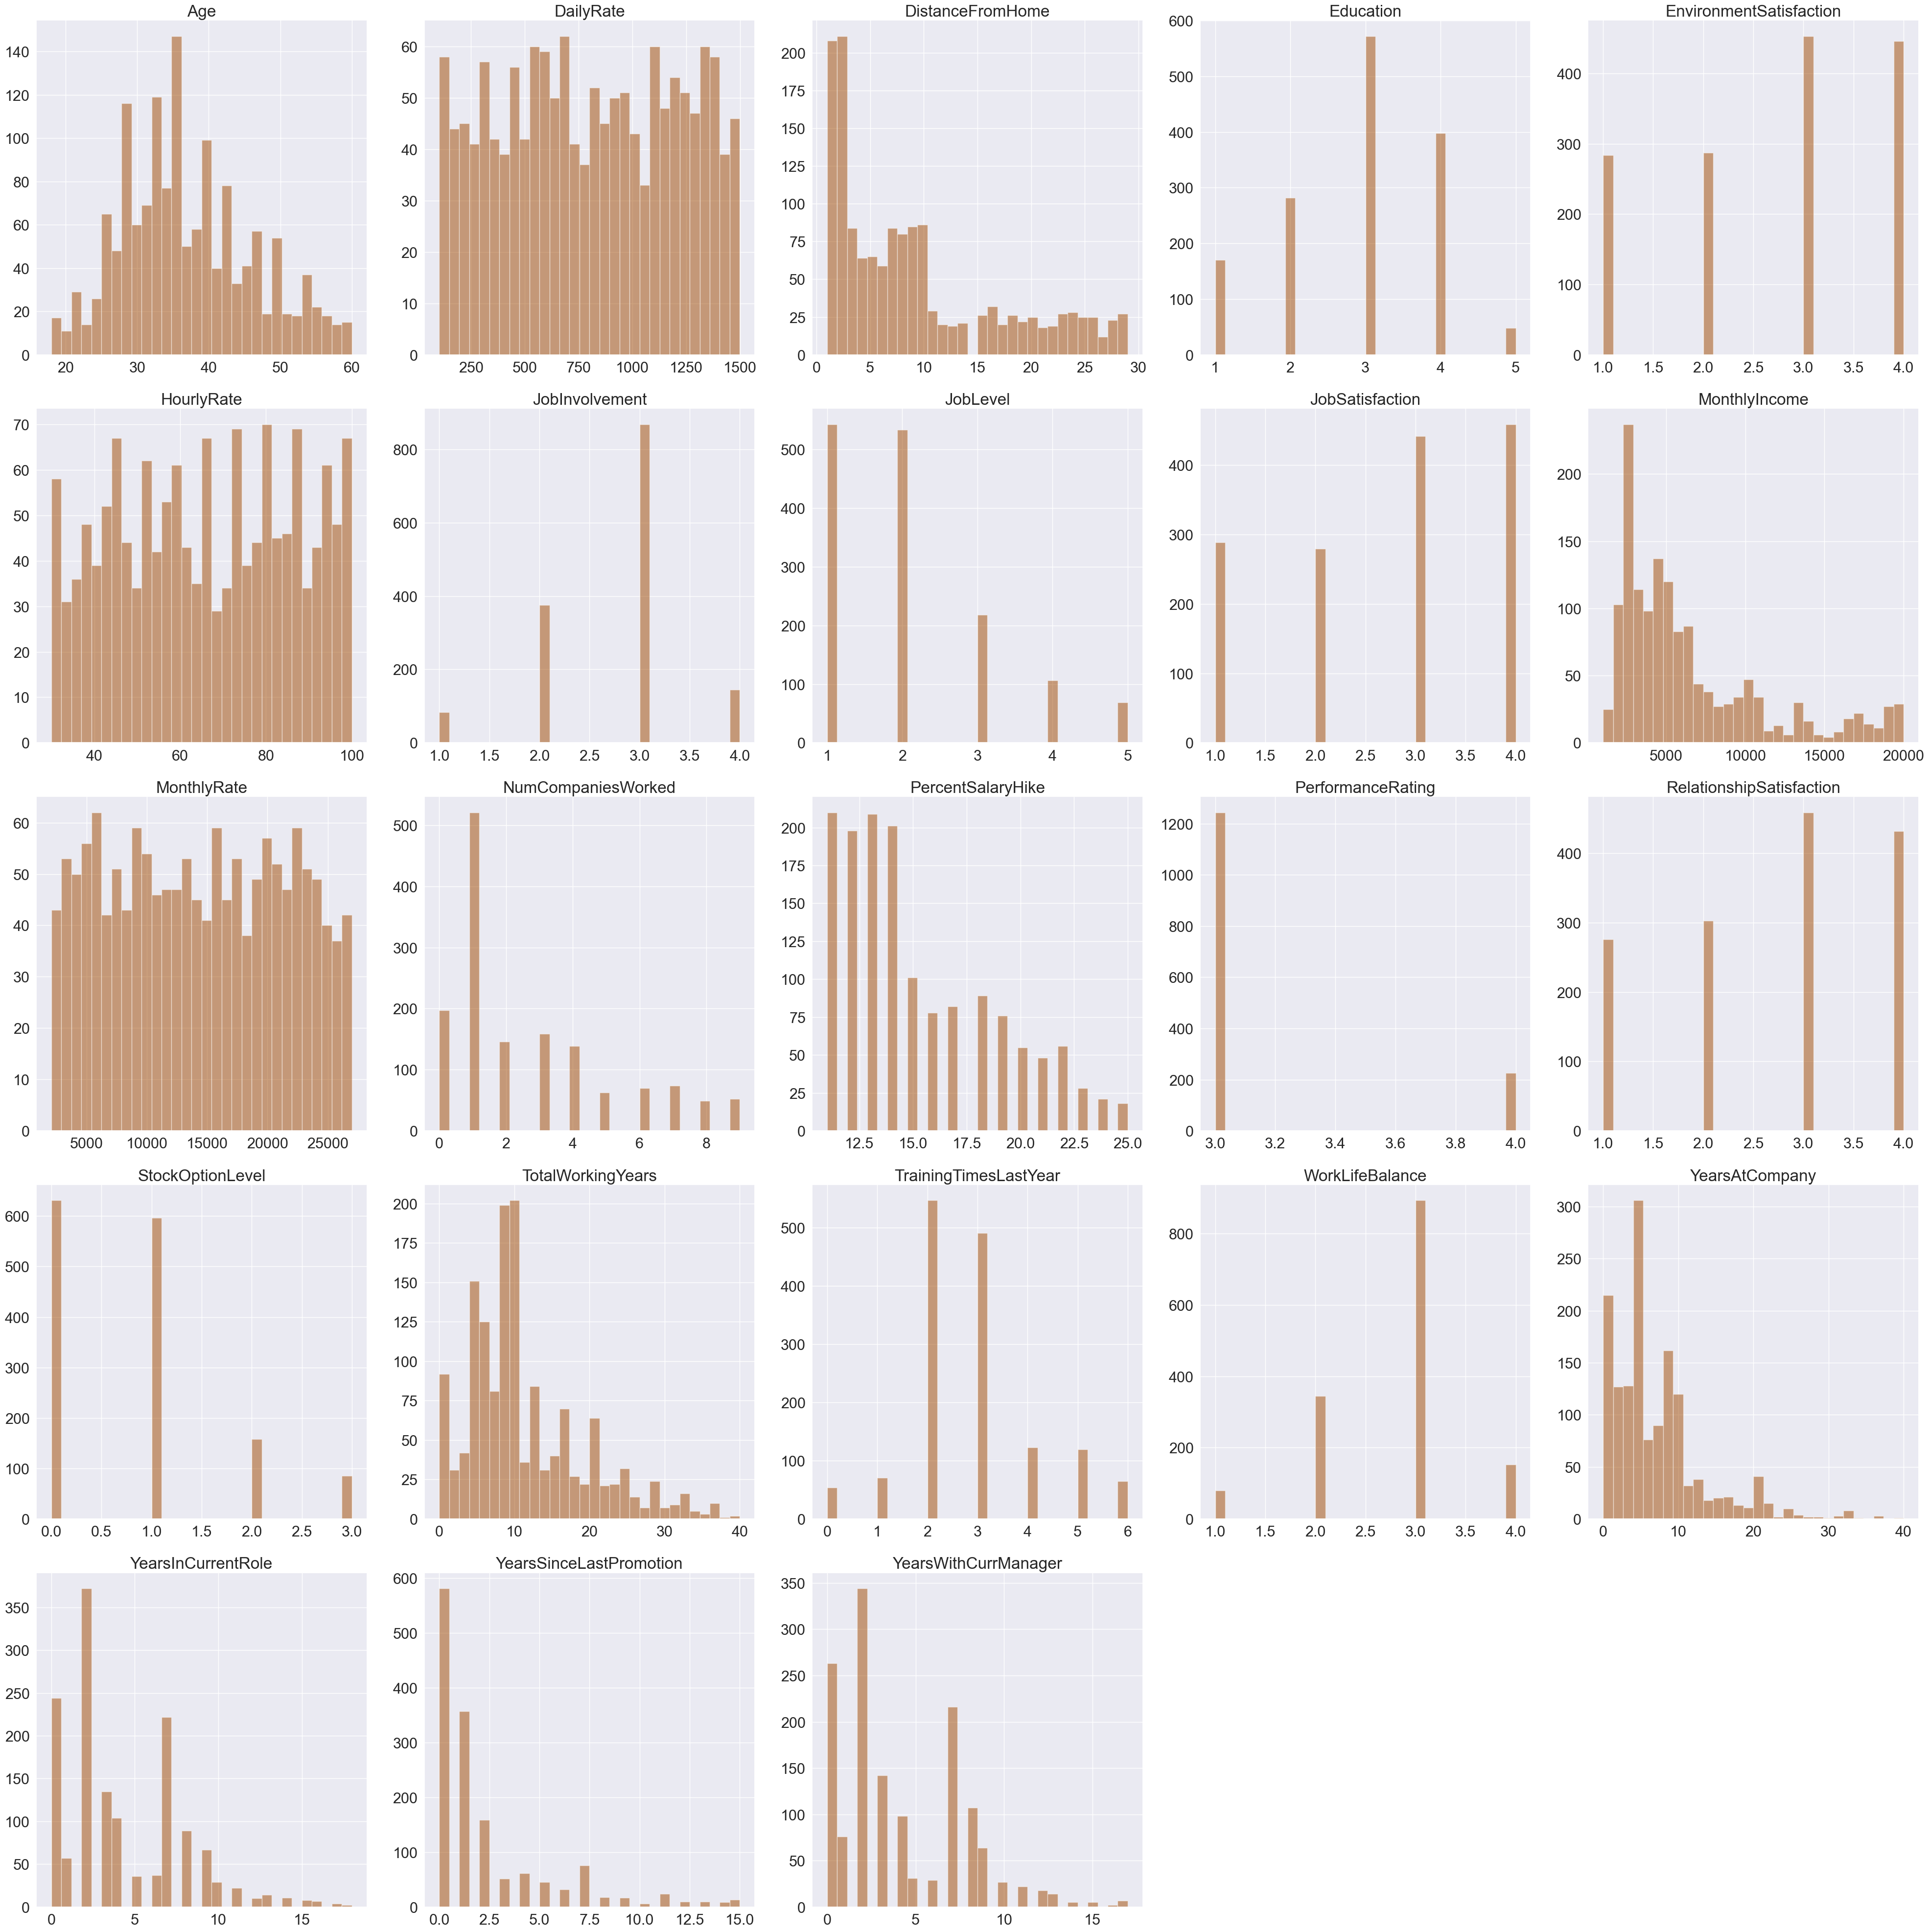

In [19]:
# Define color palette
my_palette = sns.color_palette('bright')

# Set font size
sns.set(font_scale=2)

# Plot histogram

df.hist(bins=30, figsize=(40,40), color=my_palette[5], alpha=0.5)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.tight_layout()
plt.show()

In [45]:
# Plotting Categorical columns

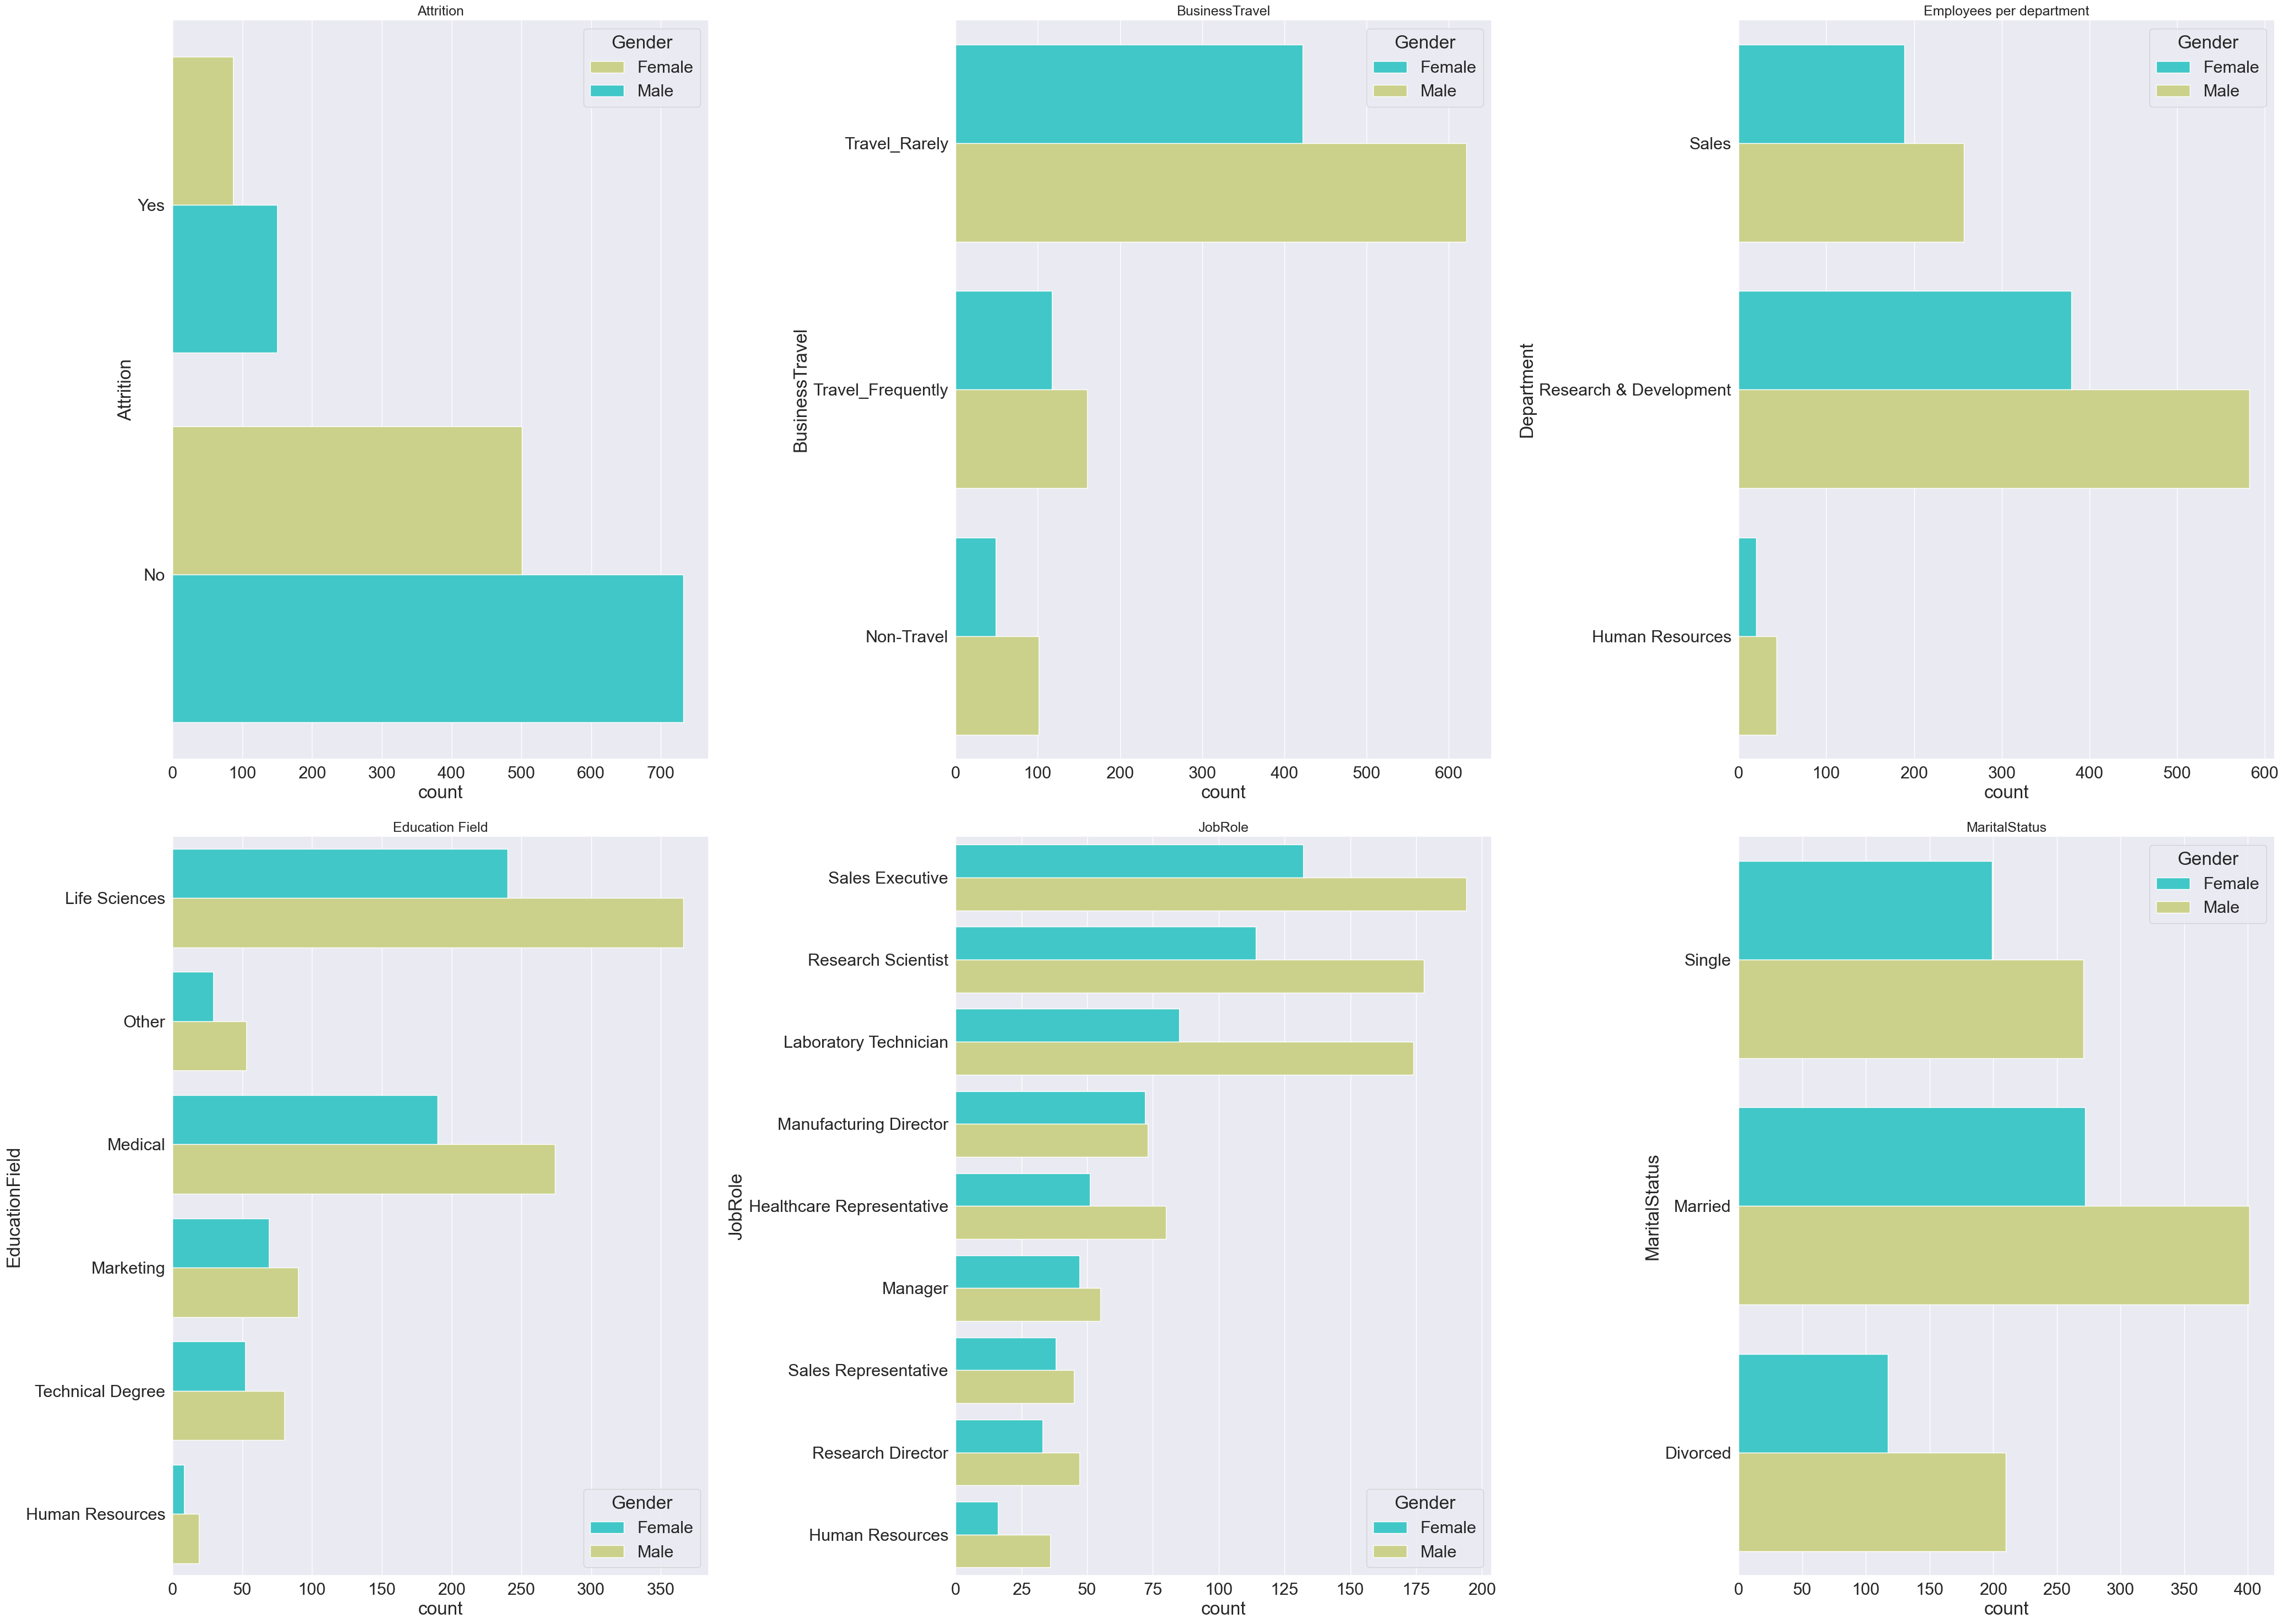

In [20]:
fig = plt.figure(figsize=(42,30))

#  subplot #1
plt.subplot(2,3,1)
plt.title('Attrition', fontsize=18)
sns.countplot(data = df, y = 'Attrition', hue= "Gender", palette='rainbow_r', orient="h")

#  subplot #2
plt.subplot(2,3,2)
plt.title('BusinessTravel', fontsize=18)
sns.countplot(data = df, y = 'BusinessTravel', hue= 'Gender', palette='rainbow', orient="h")

#  subplot #3
plt.subplot(2,3,3)
plt.title('Employees per department', fontsize=18)
sns.countplot(data = df, y = 'Department', hue = 'Gender', palette='rainbow', orient="h")

#  subplot #4
plt.subplot(2,3,4)
plt.title('Education Field', fontsize=18)
sns.countplot(data = df, y = 'EducationField', hue = 'Gender', palette='rainbow', orient="h")

#  subplot #5
plt.subplot(2,3,5)
plt.title('JobRole', fontsize=18)
sns.countplot(data = df, y = 'JobRole', hue = 'Gender', palette='rainbow', orient="h")

#  subplot #6
plt.subplot(2,3,6)
plt.title('MaritalStatus', fontsize=18)
sns.countplot(data = df, y = 'MaritalStatus', hue = 'Gender', palette='rainbow', orient="h")

# Adjust plot spacing
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.tight_layout()
plt.show()

In [46]:
# Volinplot is easy to interpret and to get insights from numerical columns. It can also detect any outliers present in Data Set.

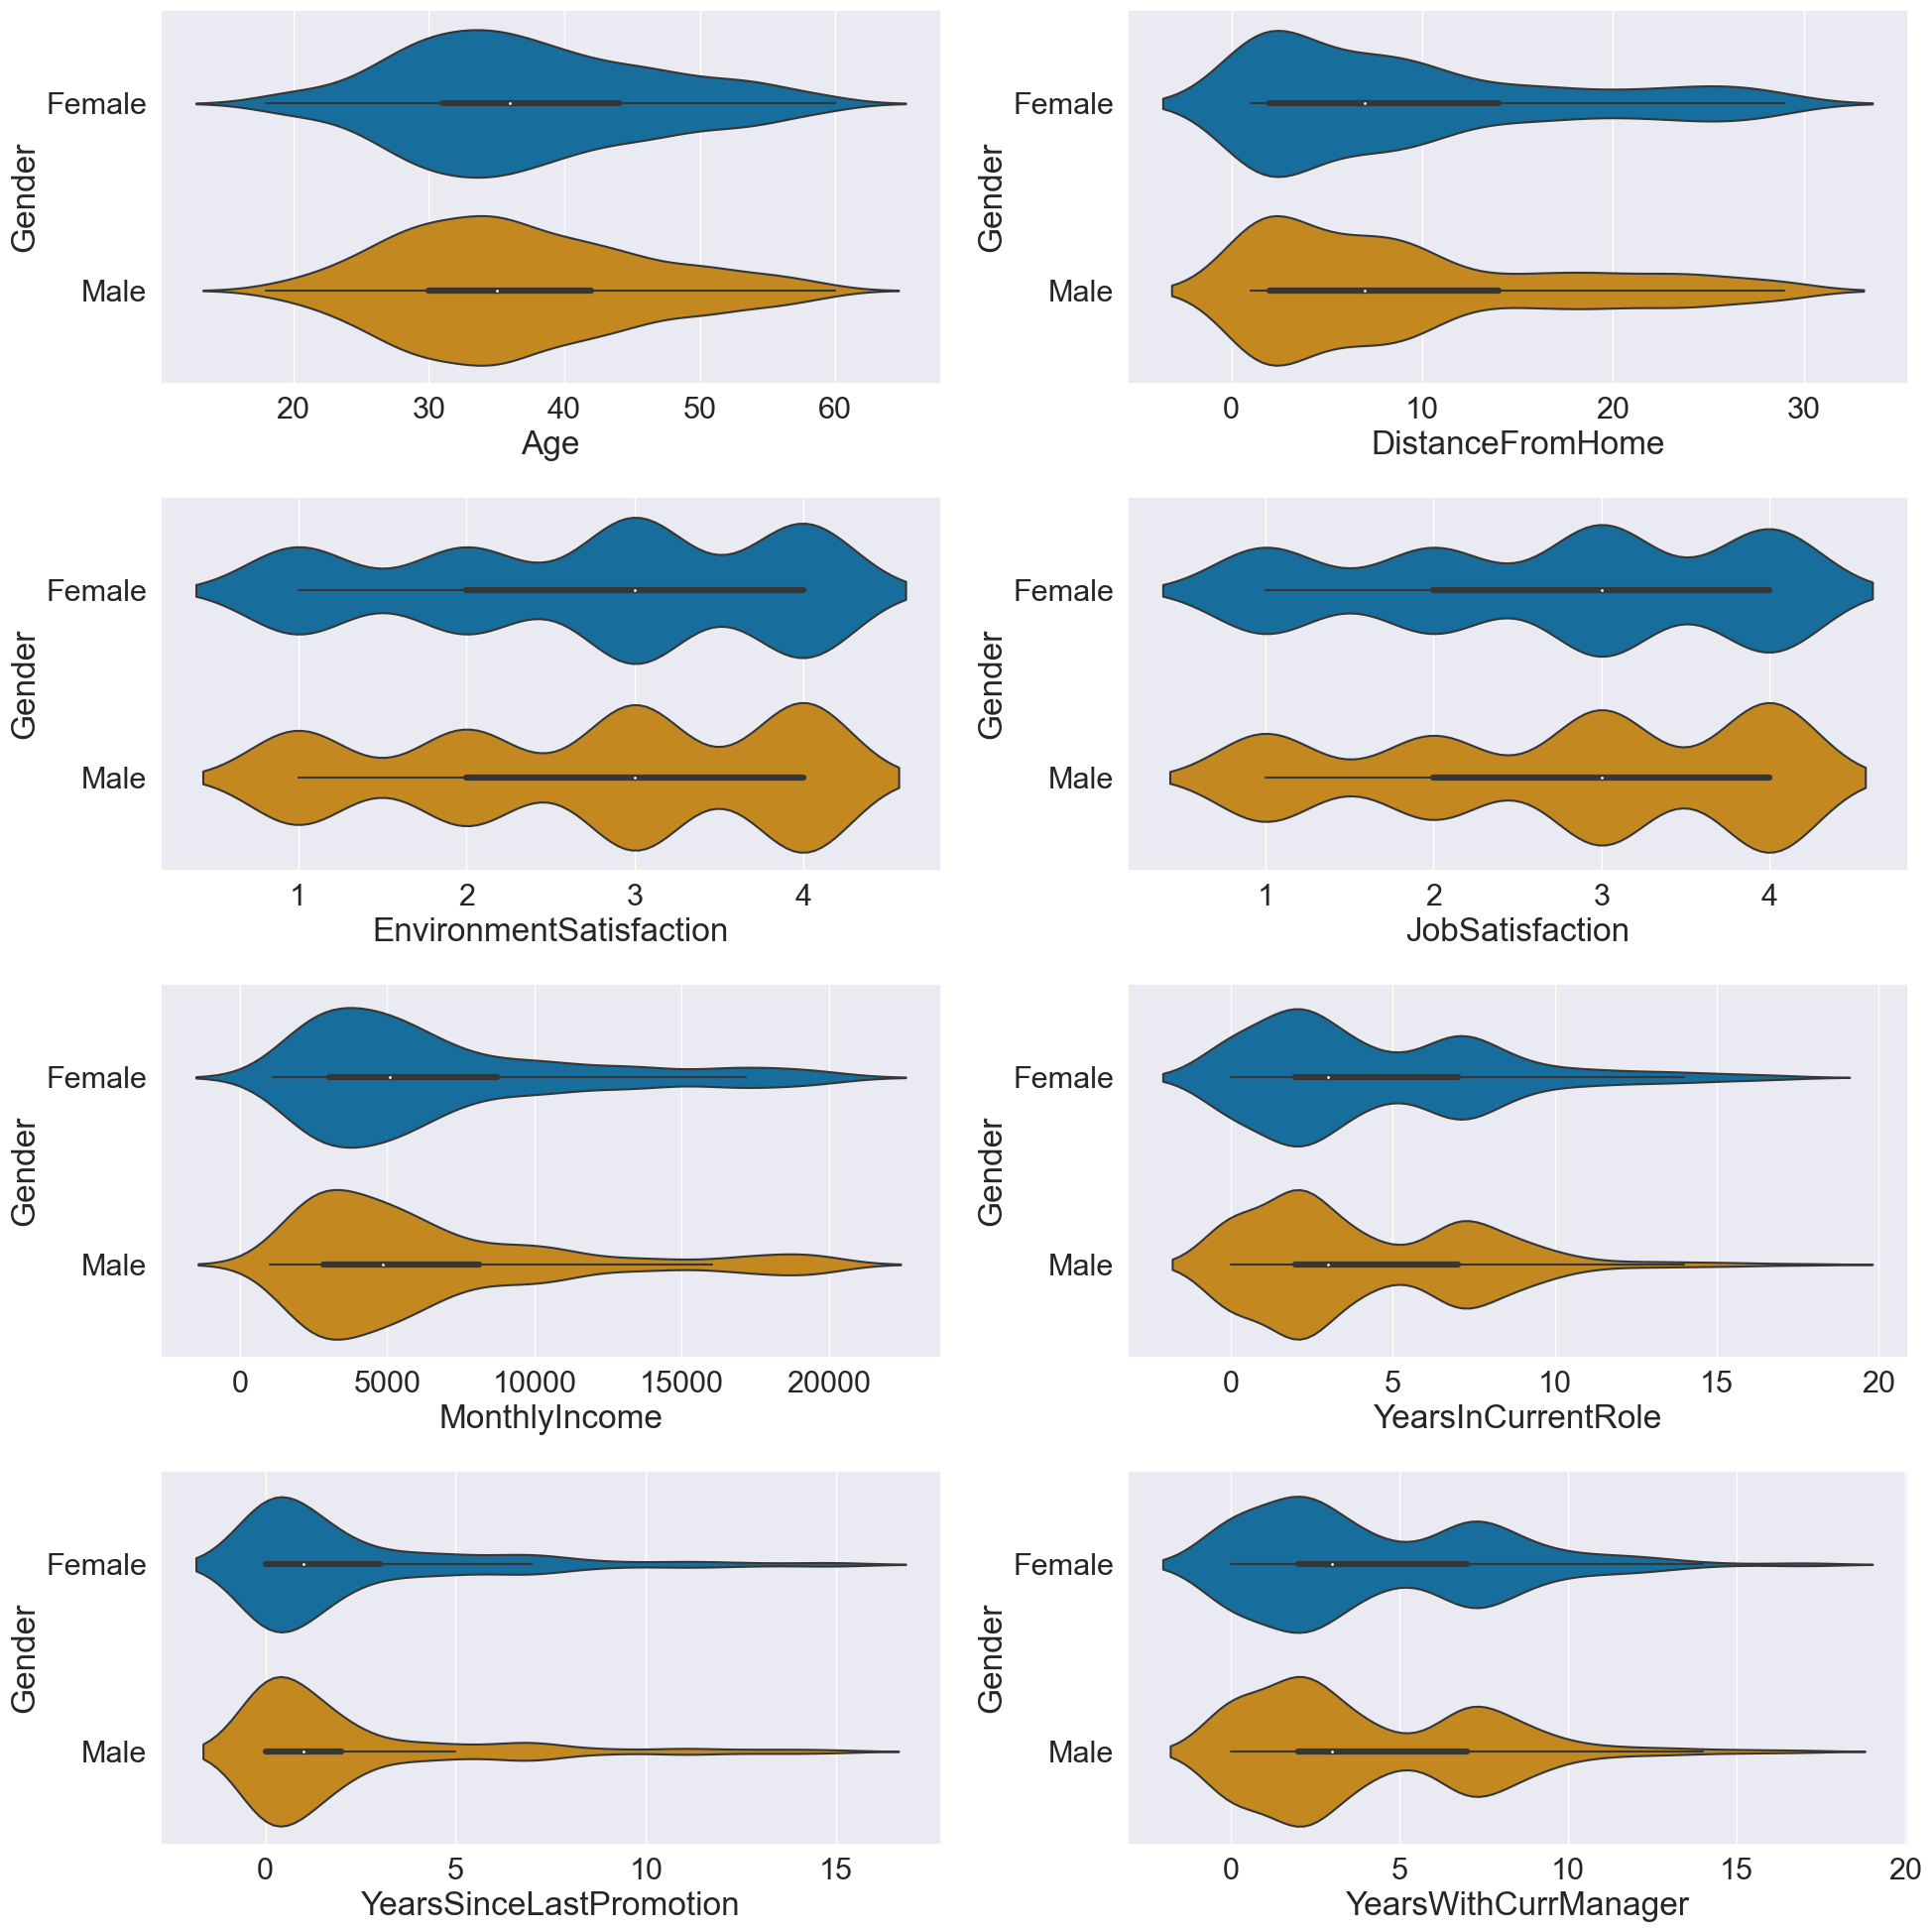

In [21]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20))

sns.violinplot(ax=axes[0, 0], data=df, x='Age', y='Gender', palette='colorblind')
sns.violinplot(ax=axes[0, 1], data=df, x='DistanceFromHome', y='Gender', palette='colorblind')
sns.violinplot(ax=axes[1, 0], data=df, x='EnvironmentSatisfaction', y='Gender', palette='colorblind')
sns.violinplot(ax=axes[1, 1], data=df, x='JobSatisfaction', y='Gender', palette='colorblind')
sns.violinplot(ax=axes[2, 0], data=df, x='MonthlyIncome', y='Gender', palette='colorblind')
sns.violinplot(ax=axes[2, 1], data=df, x='YearsInCurrentRole', y='Gender', palette='colorblind')
sns.violinplot(ax=axes[3, 0], data=df, x='YearsSinceLastPromotion', y='Gender', palette='colorblind')
sns.violinplot(ax=axes[3, 1], data=df, x='YearsWithCurrManager', y='Gender', palette='colorblind')

plt.tight_layout()
plt.show()

In [47]:
# Checking Correlation

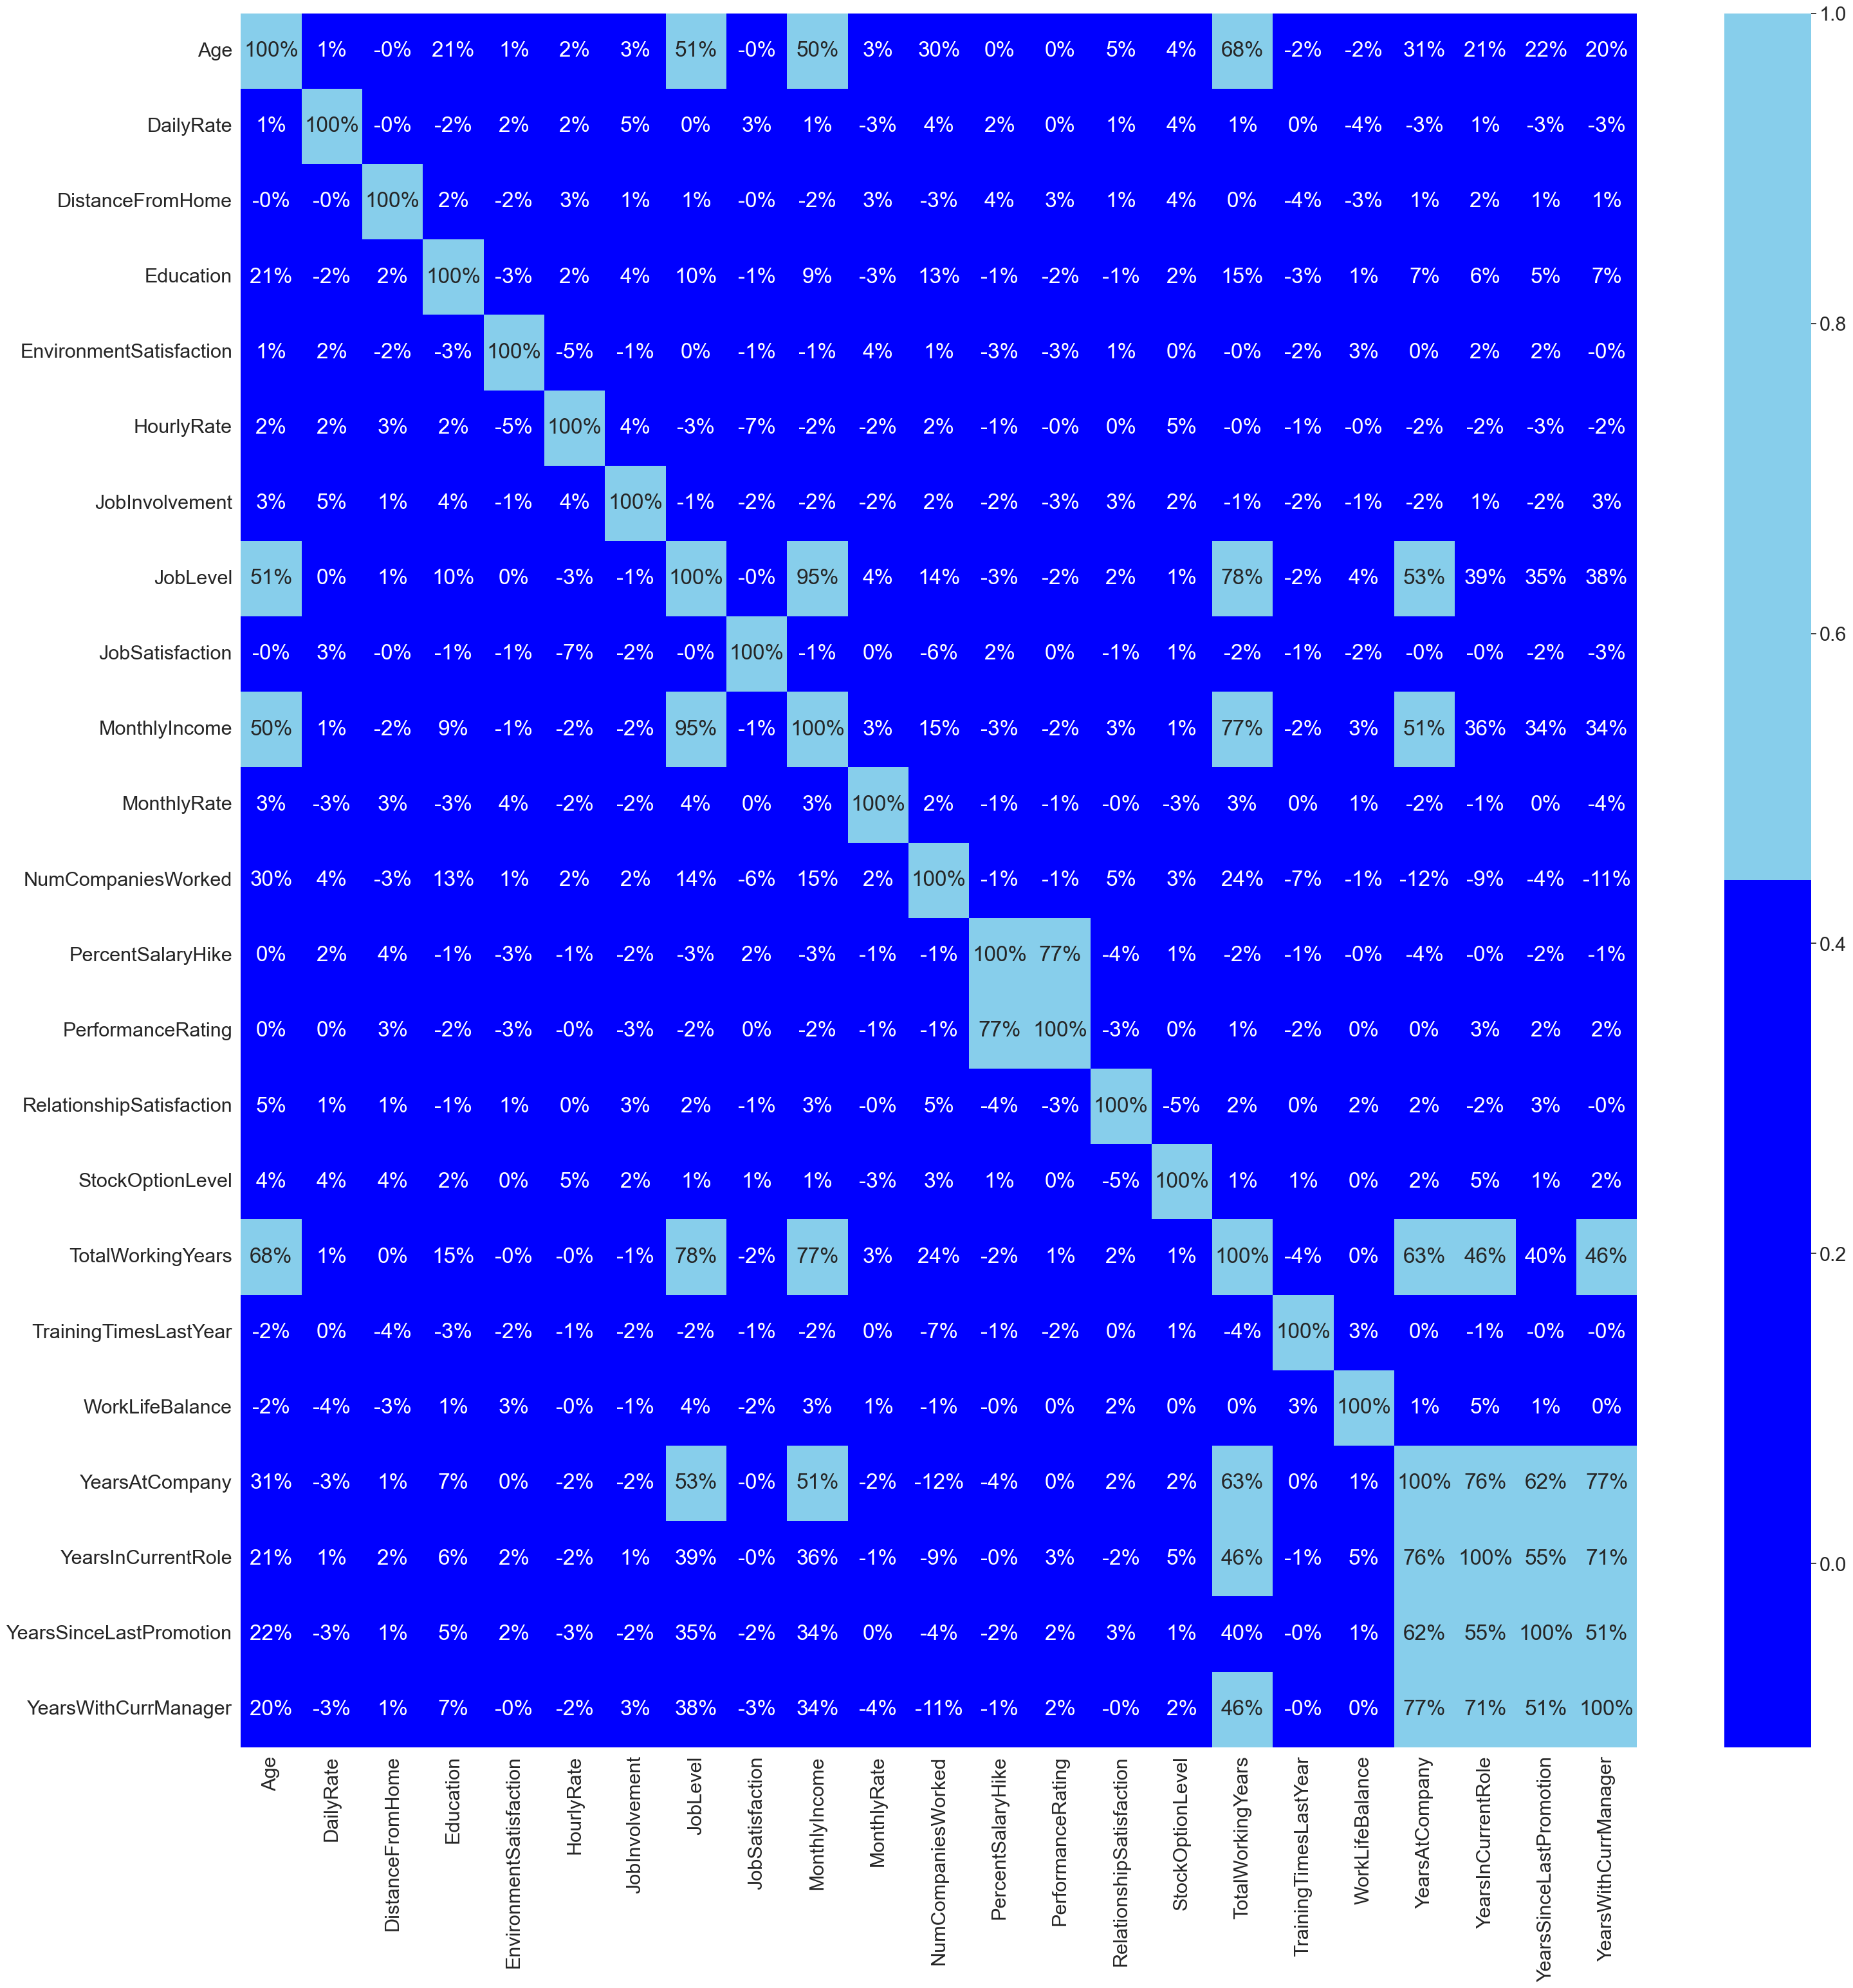

In [22]:
# Separate X and y variables
X = df[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 
          'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 
          'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
          'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 
          'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 
          'YearsSinceLastPromotion', 'YearsWithCurrManager']]
y = df[['Attrition']].values.ravel()

# Create a correlation matrix
corr_matrix = X.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(35,35))
sns.heatmap(corr_matrix, annot=True, fmt='.0%', cmap=sns.color_palette(['blue', 'skyblue']))

# Show the plot
plt.show()

In [48]:
# Checking for Outliers In Dataset

In [23]:
out = df[['Age','DistanceFromHome','EnvironmentSatisfaction','JobSatisfaction','StockOptionLevel','YearsInCurrentRole','YearsSinceLastPromotion']]

<AxesSubplot:>

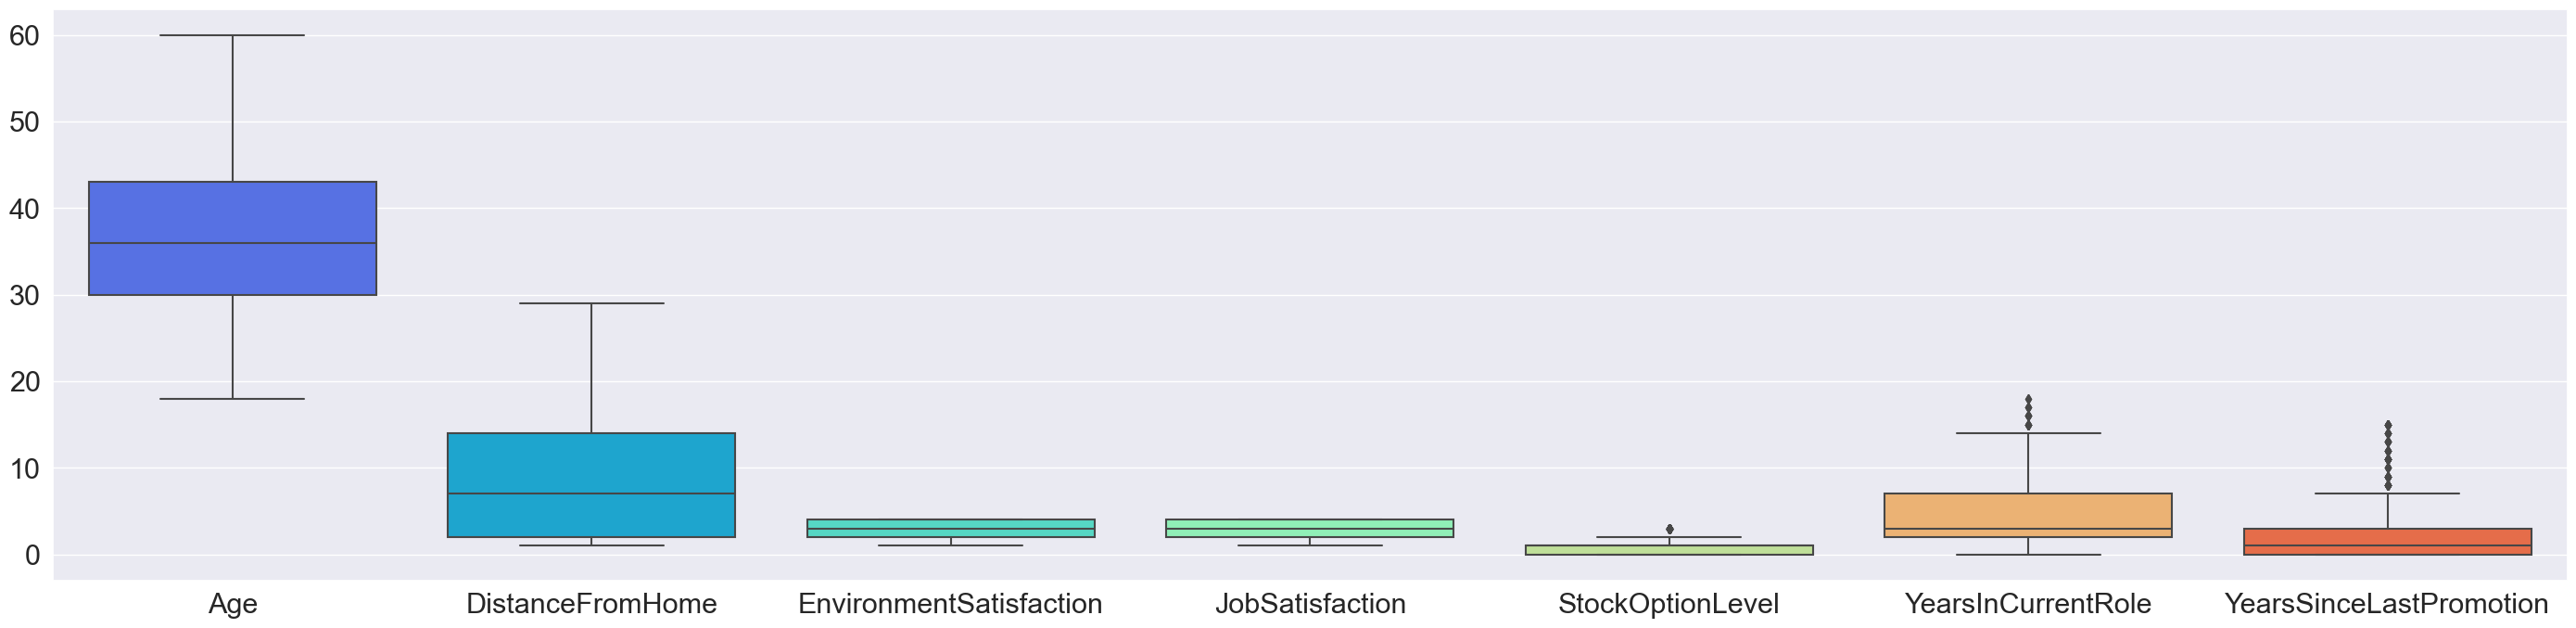

In [24]:
plt.figure(figsize=(35,8))
sns.boxplot(data=out, palette='rainbow')

<AxesSubplot:>

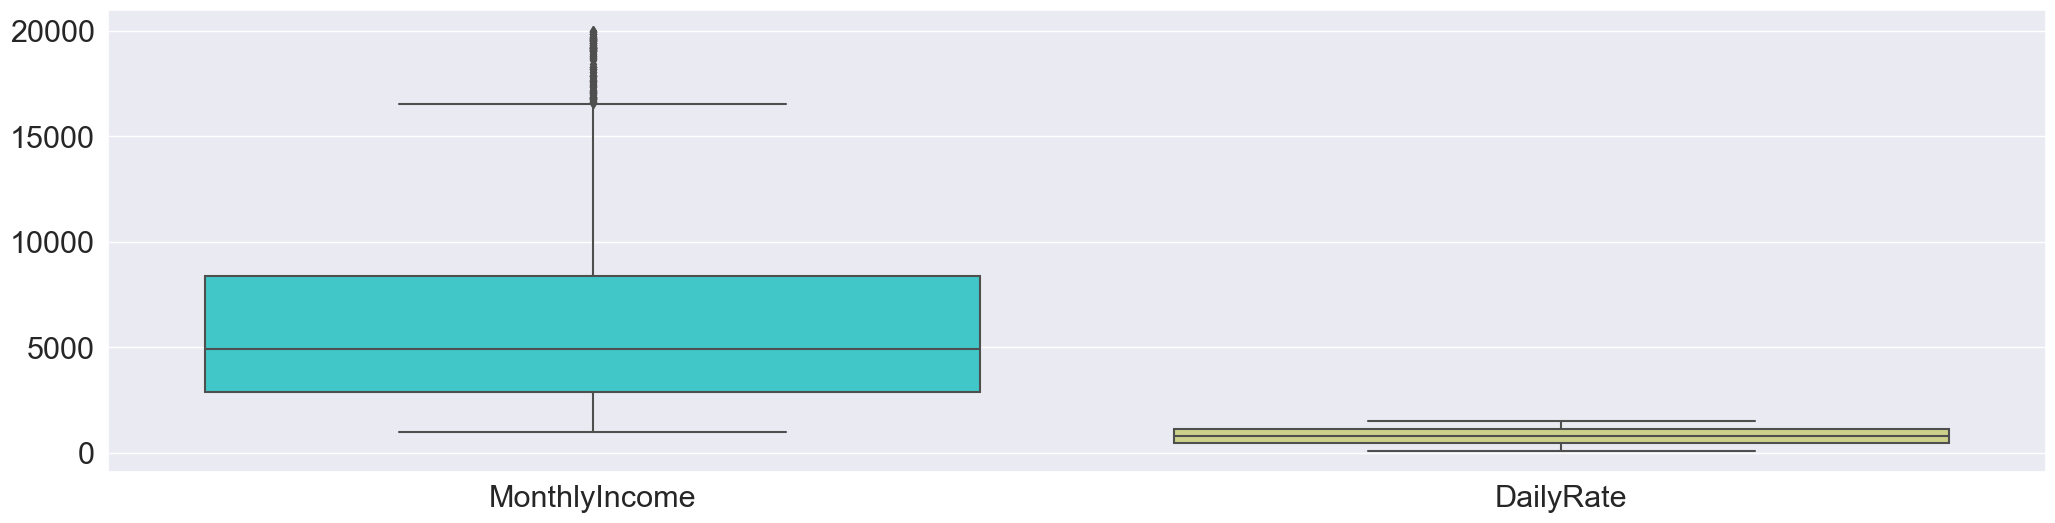

In [25]:
#checking for the outliers in monthly income and dailyrate
out1 = df[['MonthlyIncome','DailyRate']]
plt.figure(figsize=(25,6))                      
sns.boxplot(data=out1, palette='rainbow')       

In [50]:
# Data Interpretation--Questionnaire

In [51]:
Question 1: How is attrition dependent on Age?

Object `Age` not found.


In [ ]:
Question 1: How is attrition dependent on Age

In [26]:
#Show the number of employees that left and stayed by age
color_map = {'Yes': 'lightgreen', 'No': 'skyblue'}
age_att = df.groupby(['Age','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(age_att, x='Age', y='Counts', color='Attrition', title='Agewise Counts of People in an Organization',
              color_discrete_map=color_map)

In [52]:
Question 2: Is income the main factor towards employee attrition?

Object `attrition` not found.


In [53]:
#Question 2: Is income the main factor towards employee attrition

In [27]:
# Group data by MonthlyIncome and Attrition and count the number of occurrences
rate_att = df.groupby(['MonthlyIncome', 'Attrition']).size().reset_index(name='Counts')

# Round MonthlyIncome to nearest thousand
rate_att['MonthlyIncome'] = rate_att['MonthlyIncome'].round(-3)

# Group by MonthlyIncome and Attrition again and count the number of occurrences
rate_att = rate_att.groupby(['MonthlyIncome', 'Attrition']).size().reset_index(name='Counts')

# Create the line plot with custom colors and labels
fig = px.line(rate_att, x='MonthlyIncome', y='Counts', color='Attrition',
              title='Monthly Income Basis Counts of People in an Organization',
              color_discrete_sequence=['#8CE68C', '#87CDF6'])

# Show the plot
fig.show()

In [54]:
# Question 3: Does the Department of work impact attrition?

In [28]:
color_map2 = {'Yes': 'lightgreen', 'No': 'skyblue'}
dept_att=df.groupby(['Department','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.bar(dept_att, x='Department', y='Counts', color='Attrition', title='Department Wise Counts of People in an Organization',
             color_discrete_map=color_map2)


In [55]:
Question 4: How does self Job Satisfaction impact the Attrition?

Object `Attrition` not found.


In [ ]:
Question 4: How does self Job Satisfaction impact the Attrition

In [29]:
# Group the data by JobSatisfaction and Attrition and count the number of occurrences
jsats_att = df.groupby(['JobSatisfaction', 'Attrition'])['DailyRate'].count().reset_index(name='Counts')

# Create the area plot
fig = px.area(jsats_att, x='JobSatisfaction', y='Counts', color='Attrition',
              title='Job Satisfaction Level Counts of People in an Organization', color_discrete_map=color_map2)
# Show the plot
fig.show()

In [56]:
Question 5: How does Work Life Balance impact the overall attrition rates?

Object `rates` not found.


In [57]:
#Question 5: How does Work Life Balance impact the overall attrition rates

In [30]:
# Group the data by WorkLifeBalance and Attrition and count the number of occurrences
wlb_att = df.groupby(['WorkLifeBalance', 'Attrition'])['DailyRate'].count().reset_index(name='Counts')

# Create the bar plot
fig = px.bar(wlb_att, x='WorkLifeBalance', y='Counts', color='Attrition',
             title='Work Life Balance Level Counts of People in an Organization', color_discrete_map=color_map2)
# Show the plot
fig.show()

In [58]:
# Machine Learning Algorithms for Attrition Prediction

In [31]:
#Transform non numerical columns into numerical columns
for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

In [32]:
#create new column
df['Age_Years'] = df['Age']

In [33]:
#drop the age column
df = df.drop('Age', axis = 1)

In [34]:
df.head()

Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0          1               2        624           2                 0   
1          0               1        113           1                 7   
2          1               2        805           1                 1   
3          0               1        820           1                 2   
4          0               2        312           1                 1   

   Education  EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0          1               1                        1       0          64   
1          0               1                        2       1          31   
2          1               4                        3       1          62   
3          3               1                        3       0          26   
4          0               3                        0       1          10   

   ...  RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0  ...                         0                 0                  8   
1  ...                         3                 1                 10   
2  ...                         1                 0                  7   
3  ...                         2                 0                  8   
4  ...                         3                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                0               6                   4   
1                      3                2              10                   7   
2                      3                2               0                   0   
3                      3                2               8                   7   
4                      3                2               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  Age_Years  
0                        0                     5         23  
1                        1                     7         31  
2                        0                     0         19  
3                        3                     0         15  
4                        2                     2          9  

[5 rows x 31 columns]

In [35]:
#Split the data and create an independent x data set and dependent y data set
X = df.iloc[:,1:df.shape[1]].values
Y = df.iloc[:,0].values

#0 indicated: no attrition - emplooyee is working at the company
#1 indicates: there is attrition - employee resigned the company 

In [36]:
#Split the data into 75% training and 25% testing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=1234)

In [37]:
X.shape

(1470, 30)

In [38]:
Y.shape

(1470,)

In [59]:
#Random forest classification

In [39]:
# Create a model (object) for classification
rfcm = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
# Build a random forest classification model
rfcm.fit(X_train, Y_train)
# Make predictions using the test data
Y_pred = rfcm.predict(X_test)

In [40]:
# Print the performance scores.
print('\n** Performance Scores **')
# Calculate accuracy
accuracy = rfcm.score(X_test, Y_test)
print('Accuracy: {0:.2f}'.format(accuracy))
# show the Classification Report
print('\n** Classification Report using Random Forest Algorithm **\n')
print(metrics.classification_report(Y_test,Y_pred))


** Performance Scores **
Accuracy: 0.86

** Classification Report using Random Forest Algorithm **

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       311
           1       0.71      0.18      0.28        57

    accuracy                           0.86       368
   macro avg       0.79      0.58      0.60       368
weighted avg       0.84      0.86      0.82       368



In [60]:
#The important features/variables.

In [41]:
# Return the feature importances (the higher, the more important the feature).
importances = pd.DataFrame({'feature':df.iloc[:, 1:df.shape[1]].columns,'importance':np.round(rfcm.feature_importances_,3)}) #Note: The target column is at position 0
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

importance
feature                             
MonthlyIncome                  0.073
Age_Years                      0.064
MonthlyRate                    0.060
DistanceFromHome               0.055
OverTime                       0.051
HourlyRate                     0.048
YearsAtCompany                 0.047
TotalWorkingYears              0.047
DailyRate                      0.046
NumCompaniesWorked             0.037
EnvironmentSatisfaction        0.033
PercentSalaryHike              0.033
JobRole                        0.031
YearsInCurrentRole             0.030
TrainingTimesLastYear          0.030
JobLevel                       0.028
YearsSinceLastPromotion        0.027
MaritalStatus                  0.027
StockOptionLevel               0.027
RelationshipSatisfaction       0.026
WorkLifeBalance                0.025
YearsWithCurrManager           0.025
JobSatisfaction                0.024
Education                      0.022
EducationField                 0.021
JobInvolvement                 0.019
Department                     0.015
BusinessTravel                 0.014
Gender                         0.007
PerformanceRating              0.006

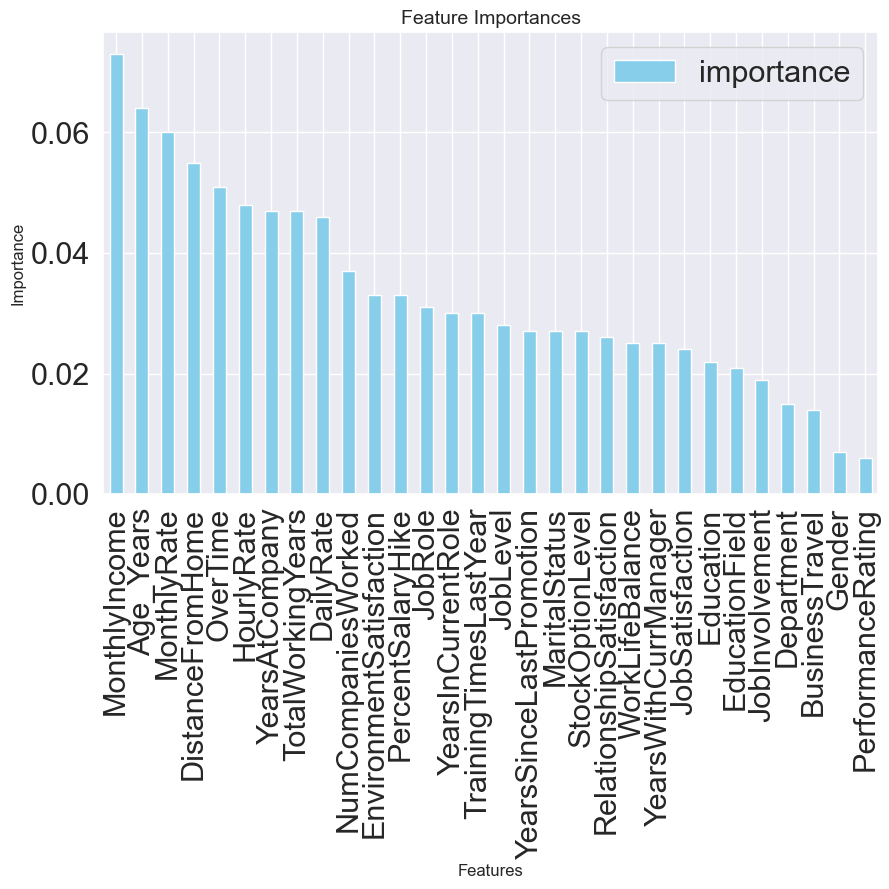

In [42]:
importances.plot(kind='bar', color='skyblue', figsize=(10,6))
plt.title('Feature Importances', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.show()

In [ ]:
Thank you.